In [29]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np


In [15]:
(X_train, y_train), (X_test, y_test)=keras.datasets.fashion_mnist.load_data()

In [17]:
X_train_flattened = X_train.reshape((60000, 784)) / 255.0
X_test_flattened = X_test.reshape((10000, 784)) / 255.0


In [49]:
# Create the model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='sigmoid'),
     keras.layers.Dense(64, activation='relu'),                      
    keras.layers.Dense(10, activation='softmax')     
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model.fit(X_train_flattened, y_train, epochs=7, validation_data=(X_test_flattened, y_test))


C:\Users\01\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 6ms/step - accuracy: 0.7541 - loss: 0.7213 - val_accuracy: 0.8221 - val_loss: 0.4908
Epoch 2/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8538 - loss: 0.3960 - val_accuracy: 0.8579 - val_loss: 0.3941
Epoch 3/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8701 - loss: 0.3542 - val_accuracy: 0.8547 - val_loss: 0.3940
Epoch 4/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8793 - loss: 0.3288 - val_accuracy: 0.8714 - val_loss: 0.3618
Epoch 5/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8853 - loss: 0.3121 - val_accuracy: 0.8742 - val_loss: 0.3485
Epoch 6/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8899 - loss: 0.2937 - val_accuracy: 0.8761 - val_loss: 0.3470
Epoch 7/7
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8989 - loss: 0.2760 - val_accuracy: 0.8752 - val_loss: 0.3396


In [39]:
model.evaluate(X_test_flattened, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8762 - loss: 0.3468


[0.35439741611480713, 0.8727999925613403]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Checks if the predicted output is correct or not compared to actual output. [1.1985543e-06 9.0859851e-07 2.2009922e-07 1.4089073e-06 1.6244854e-06
 3.4870305e-03 3.2274786e-06 7.5251223e-03 6.2663798e-07 9.8897856e-01]


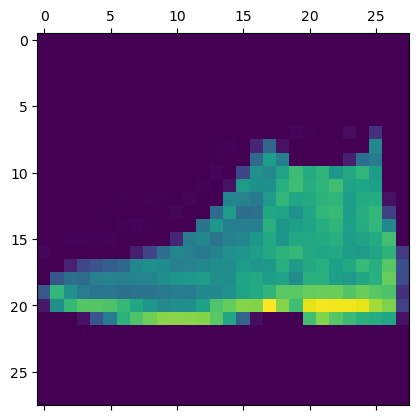

In [41]:
#Checks if the predicted output is correct or not compared to actual output.
y_predicted = model.predict(X_test_flattened)
print("Checks if the predicted output is correct or not compared to actual output.", y_predicted[0])

plt.matshow(X_test[0])
plt.show()

In [43]:
#np.argmax finds a manimum element from an array & return the index of it.
np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
print(y_predicted[:5])


[[1.1985543e-06 9.0859851e-07 2.2009922e-07 1.4089073e-06 1.6244854e-06
  3.4870305e-03 3.2274786e-06 7.5251223e-03 6.2663798e-07 9.8897856e-01]
 [1.2172452e-04 2.1985880e-07 9.9375206e-01 4.7420644e-06 3.6516995e-03
  1.2885204e-07 2.4663622e-03 1.2219714e-09 3.1510519e-06 2.9163846e-08]
 [1.2170755e-06 9.9999785e-01 8.9442686e-08 7.6657125e-07 1.0757141e-07
  1.0211012e-11 1.0277853e-08 7.0202781e-11 5.1787254e-09 6.7778887e-11]
 [1.0963147e-06 9.9997258e-01 1.0311842e-07 2.6036230e-05 1.2951585e-07
  6.6976469e-10 4.2135593e-08 1.8694553e-09 4.2392561e-09 1.3208090e-09]
 [7.4438639e-02 1.2797324e-05 5.7718023e-03 1.9961060e-03 3.3315425e-03
  8.4028507e-05 9.1296500e-01 7.9181646e-08 1.3887272e-03 1.1323429e-05]]


In [45]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_predicted_labels)
print(cm)

tf.Tensor(
[[850   5   8  39   3   3  83   0   9   0]
 [  0 973   1  17   5   0   4   0   0   0]
 [ 13   1 772  24  96   1  92   0   1   0]
 [ 16  28   7 912  14   0  20   0   3   0]
 [  0   3  88  61 774   0  70   0   4   0]
 [  0   0   0   1   0 912   0  42   1  44]
 [164   1  63  45  64   0 651   0  12   0]
 [  0   0   0   0   0  12   0 936   0  52]
 [  4   0   3   6   5   2   5   5 970   0]
 [  0   0   0   0   0   2   1  19   0 978]], shape=(10, 10), dtype=int32)


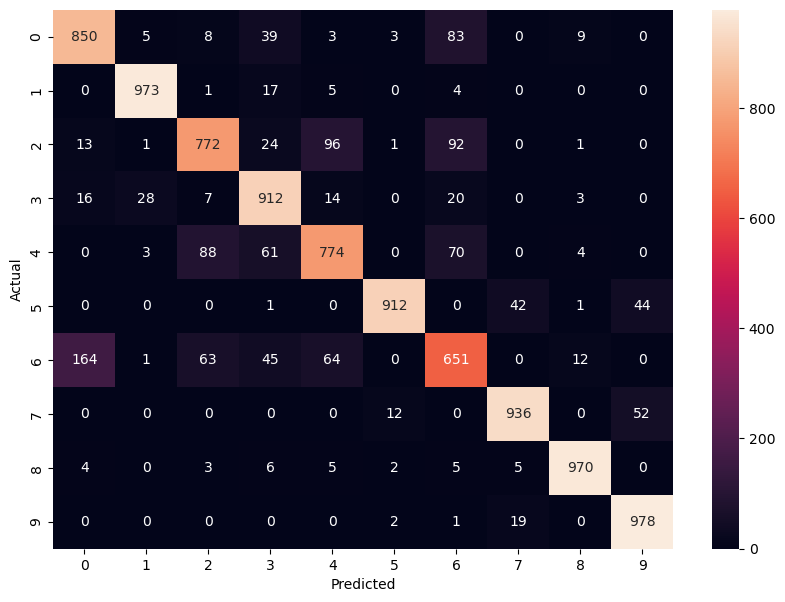

In [47]:
#Plotting 
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
